#### UMAP can generate local density map **DensMAP**
UMAP theory generate a uniformly distributed manifold. But if you concerned more about local density, this chapter will be helpful.

In [1]:
import sklearn.datasets
import umap
import umap.plot
from My_Wheels.Kill_Cache import kill_all_cache
import warnings

clean_cache = True
# This will clean all caches. Use only program crash!
if clean_cache == True:
    warnings.warn("All Cache will be clear. This will void your warranty!")
    conda_folder = r'C:\ProgramData\anaconda3\envs\umapzr'
    kill_all_cache(conda_folder)
    
mnist = sklearn.datasets.fetch_openml("mnist_784")
fmnist = sklearn.datasets.fetch_openml("Fashion-MNIST")

C:\Users\ZR\AppData\Local\Temp\ipykernel_19668\790398895.py:10: UserWarning: All Cache will be clear. This will void your warranty!
  warnings.warn("All Cache will be clear. This will void your warranty!")


Total 1290 cache folder killed.


c:\ProgramData\anaconda3\envs\umapzr\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
c:\ProgramData\anaconda3\envs\umapzr\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


CPU times: total: 3min 49s
Wall time: 1min 34s


<AxesSubplot: >

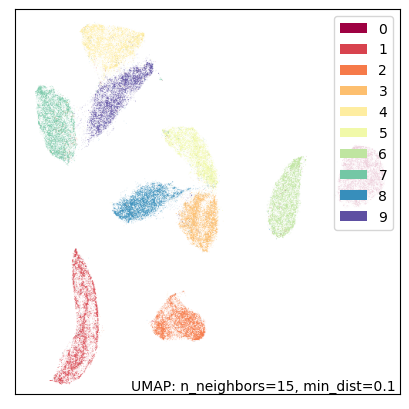

In [2]:
%%time
# plor original data.
mapper = umap.UMAP(random_state=42).fit(mnist.data)
umap.plot.points(mapper, labels=mnist.target, width=500, height=500)

##### we can produce dense map simply by set parameter ***densmap=True***

CPU times: total: 12min 27s
Wall time: 3min 17s


<AxesSubplot: >

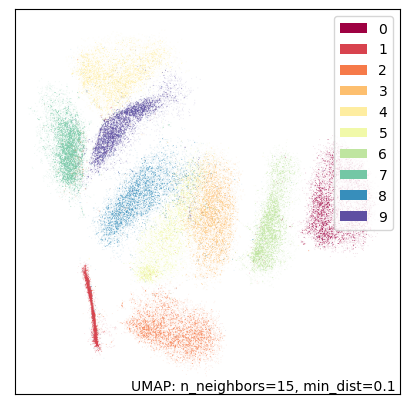

In [4]:
%%time
# plor original data.
mapper = umap.UMAP(densmap = True,random_state=42).fit(mnist.data)
umap.plot.points(mapper, labels=mnist.target, width=500, height=500)

Further parameter in densemap can be plotted by set ***dens_lambda***. <br>
Smaller ***dense_lambda*** similar to origin UMAP. Default value is 2.<br>
↓ will try this on fmnist data.

CPU times: total: 12min 45s
Wall time: 3min 28s


<AxesSubplot: >

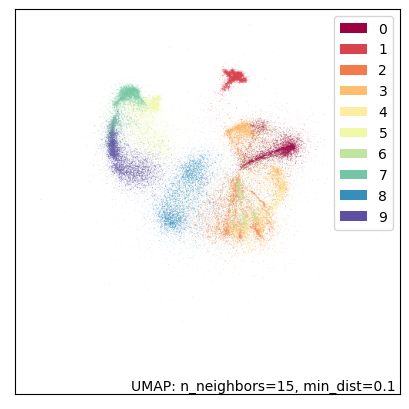

In [5]:
%%time
dens_mapper = umap.UMAP(densmap=True, dens_lambda=5.0, random_state=42).fit(fmnist.data)
umap.plot.points(dens_mapper, labels=fmnist.target, width=500, height=500)

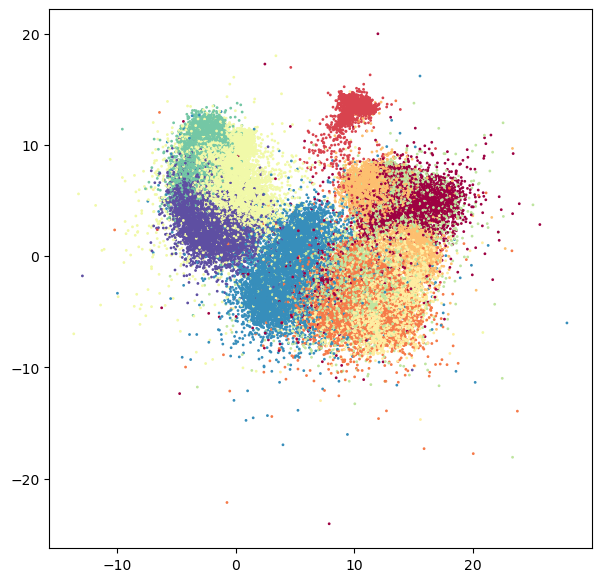

In [6]:
# we can see points in mapper.embedding_ as usual.
fig, ax = umap.plot.plt.subplots(figsize=(7,7))
ax.scatter(*dens_mapper.embedding_.T, c=fmnist.target.astype('int8'), cmap="Spectral", s=1)